In [9]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [45]:
# Importar datos: uso de Internet por minuto
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df

,value
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


In [53]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


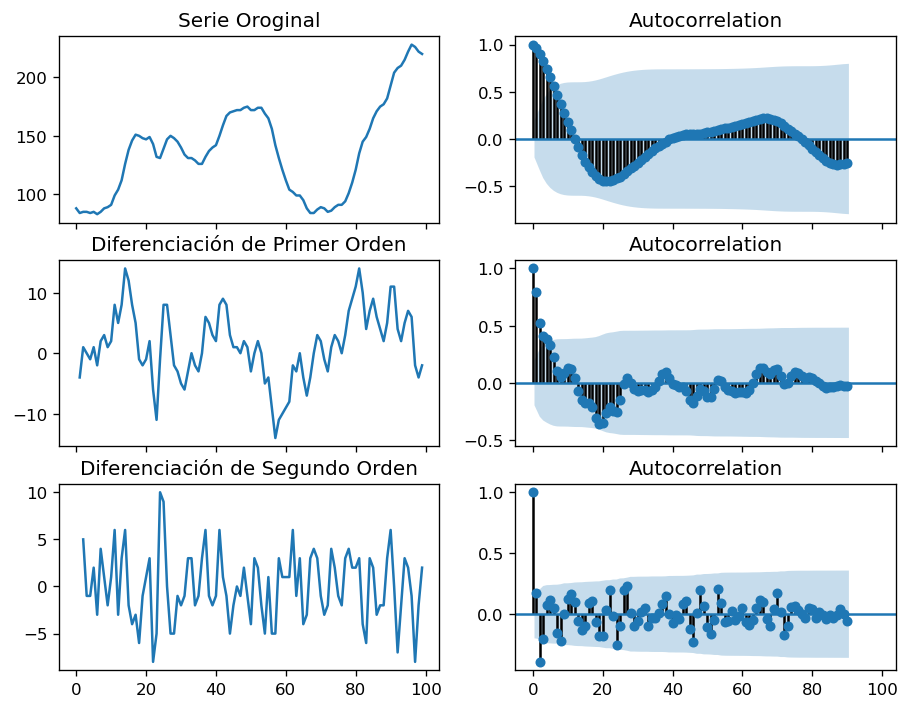

In [48]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Serie Original')
plot_acf(df.value, ax=axes[0, 1], lags=90)

# 1st Diferencial
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('Diferenciación de Primer Orden')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=90)

# 2nd Diferencial
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('Diferenciación de Segundo Orden')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=90)

plt.show()


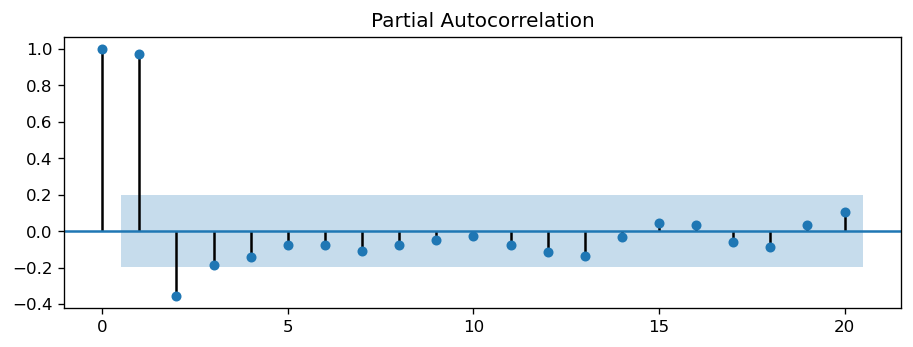

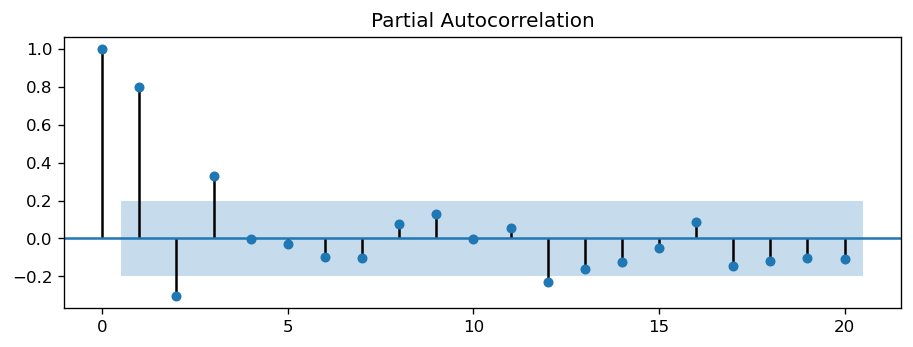

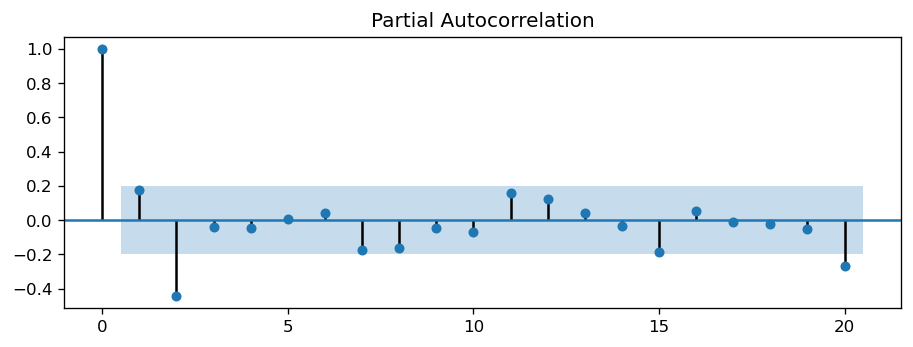

In [72]:

plot_pacf(df.value.dropna(), lags=20)
plot_pacf(df.value.diff().dropna(), lags=20)
plot_pacf(df.value.diff().diff().dropna(), lags=20)

plt.show()

In [1]:
# pip install mplcyberpunk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # gráficos

# Se usan para realizar el web scraping
import requests
import time
from io import StringIO

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")


In [2]:

url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01205PM/csv/1990-1/2021-12"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
content
csv =  StringIO(content)
csv
df = pd.read_csv(csv)
df

,Mes/A&ntilde;o,Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Compra
0,Ago.1994,2.228682
1,Sep.1994,2.250500
2,Oct.1994,2.228857
3,Nov.1994,2.185762
4,Dic.1994,2.127857
...,...,...
319,Mar.2021,3.707835
320,Abr.2021,3.697590
321,May.2021,3.770971
322,Jun.2021,3.904743


In [3]:
df = df[['Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Compra']]
df

,Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Compra
0,2.228682
1,2.250500
2,2.228857
3,2.185762
4,2.127857
...,...
319,3.707835
320,3.697590
321,3.770971
322,3.904743


<Figure size 2160x720 with 0 Axes>

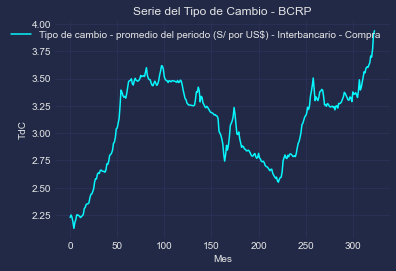

In [6]:
plt.figure(figsize=(30,10))
df.plot()
plt.title("Serie del Tipo de Cambio - BCRP")
plt.xlabel("Mes")
plt.ylabel("TdC")
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.531612
p-value: 0.517819


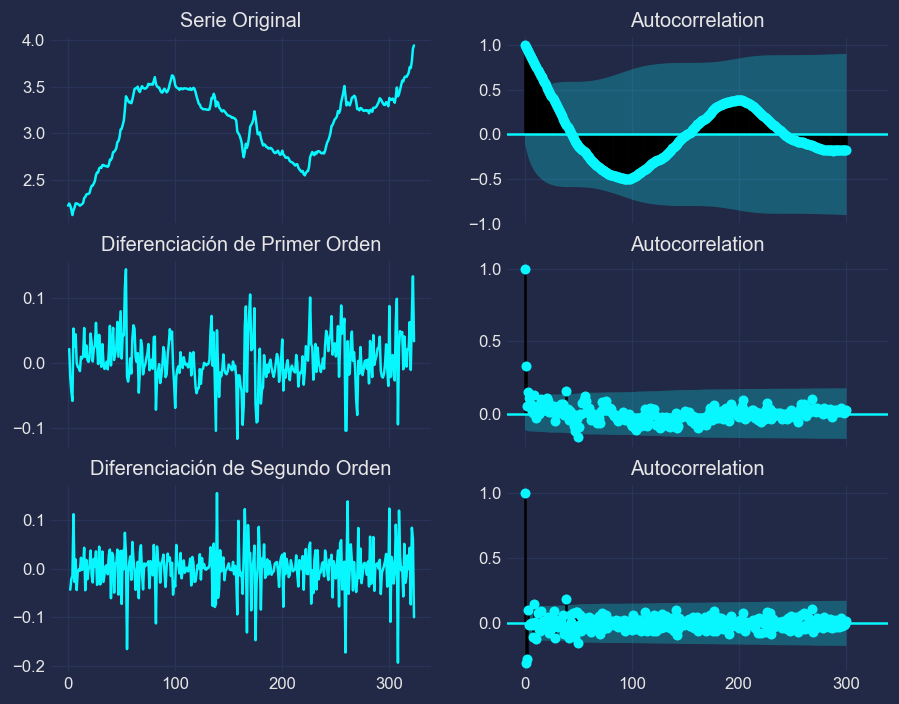

In [14]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Serie Original')
plot_acf(df, ax=axes[0, 1], lags=300)

# 1st Diferencial
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('Diferenciación de Primer Orden')
plot_acf(df.diff().dropna(), ax=axes[1, 1], lags=300)

# 2nd Diferencial
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('Diferenciación de Segundo Orden')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1], lags=300)

plt.show()

In [15]:
df1 = df.diff()

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.633907
p-value: 0.000000
